## Outlier Detection
- In this notebook we'll look into the techniques on Outlier detection.
- We will learn:
  - z score
  - Interquartile Range (IQR)
  - Box Plot (from package seaborn)

**1. Outlier Detection using Z score**
- Z score for item x gives how many standard deviation it is away from the mean.
- As per Empirical Formulae:
  - 68% of data points will be in the region of 1 standard deviation.
  - 95% of data points will be in the region of 2 standard deviation.
  - 99.7% of data points will be in the region of 3 standard deviation.

- So, we can say any data points above `mean + 3*SD` or below `mean - 3*SD` as outliers
- **`Formulae:`**
  - The z-score formula is given by:  
$$ z = \frac{x - \mu}{\sigma} $$

    Where,
    - \( z \) represents the z-score.
    - \( x \) is the individual data point.
    - $ ( \mu ) $ is the mean of the data set.
    - $( \sigma ) $ is the standard deviation of the data set.

In [1]:
# import package

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create Custom Dataset
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]
print(dataset)

[11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


**histogram plot**

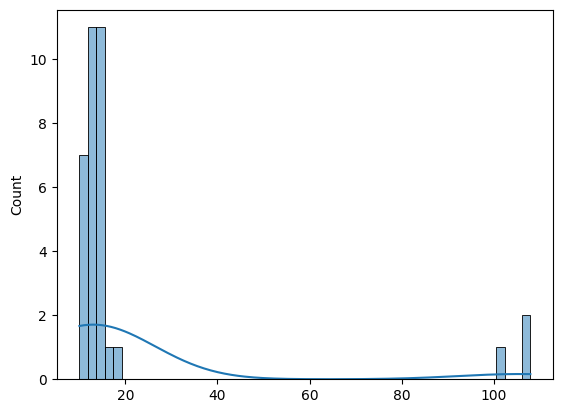

In [3]:
sns.histplot(dataset, kde=True)
plt.show()

- Above distribution is not normally distributed.
- It is Right Tailed i.e. Right Skewed.
- It may be due to some high values i.e. near to 100.
- Let's try to detect outliers and remove if any.

**outlier detection**

In [5]:
# Detect outliers
THRESHOLD = 3


def detect_outliers(data):
  outliers = []

  # get mean
  mean = np.mean(data)

  # get standard deviation
  std = np.std(data)

  # Apply Z score for each and every point in the datasets.
  for i in data:
    z_score = (i - mean) / std

    # check for outliers
    # append to outlier list in the case of outlier
    if np.abs(z_score) > THRESHOLD:
      outliers.append(i)
  return outliers

In [6]:
# function call
outliers = detect_outliers(dataset)
outliers

[102, 107, 108]

- Here, data points 102, 107, 108 falls under the section of outliers.

In [7]:
## **Remove Outliers** *italicized text*

# dataset_new = [item for item in dataset if item not in [102, 107, 108]]

# sns.histplot(dataset_new, kde=True)

**2. Outlier Detection using Interquartile Range (IQR)**
- IQR is the difference between Q3 and Q1 i.e.
  - `IQR = Q3 - Q1`,  
  where,  
  Q3 is 75% percentile  
  Q1 is 50% percentile

- For Detecting Outliers we need to identify Lower Fence and Upper Fence i.e.
  - Lower Fence = Q1 - 1.5 * IQR
  - Upper Fence = Q3 + 1.5 * IQR

  - For Outliers:
    - Data points > Upper Fence or
    - Data points < Lower Fence

- **`Steps:`**  
  1. Sort the data in ascending Order.
  2. Calculate Q1 and Q3.
  3. Calculate IQR.
  4. Find Lower Fence and Upper Fence.
  5. Make Conclusion.

In [8]:
# redefine dataset

dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19,
           107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15,
           12, 10, 14, 13, 15, 10]

In [2]:
## Step 1: sort the dataset in ascending order
dataset = sorted(dataset)
print(dataset)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [9]:
## Step 2: calculate Q1 and Q3
# Q1: 25% percentile
# Q3: 75% percentile

Q1, Q3 = np.percentile(dataset, [25, 75])

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

Q1: 12.0
Q3: 15.0


In [10]:
## Step 3: Compute IQR

iqr = Q3 - Q1

print(f"IQR: {iqr}")

IQR: 3.0


In [11]:
## Step 4: Compute Lower Fence and Upper Fence

lower_fence = Q1 - (1.5 * iqr)
upper_fence = Q3 + (1.5 * iqr)

print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

Lower Fence: 7.5
Upper Fence: 19.5


In [12]:
## Step 5: Make Conclusion

def detect_outlier_using_iqr(data, iqr, lower_fence, upper_fence):
  outliers = []
  for i in data:
    if i < lower_fence or i > upper_fence:
      outliers.append(i)

  return outliers

In [13]:
# function call
outliers = detect_outlier_using_iqr(dataset, iqr, lower_fence, upper_fence)
print(f'Detected Outliers:\n {outliers}')

Detected Outliers:
 [102, 107, 108]


```
- This means the detected Outliers using Z-score and IQR are same.
- Here data points [102, 107, 108] are considered as an outliers.
- This is handled in data preparations phase of Data science Methodology.
```

**3. Outliers Detection using Box plot**
- Box plots are great way to visualize numeric data.
- In order to draw Box plot, we need:  
  1. Minimum
  2. First Quartile (Q1)
  3. Median
  4. Third Quartile (Q3)
  5. Maximum

- Let's use seaborn package to draw Box plot.

In [14]:
# redefine dataset
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]
print(dataset)

[11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


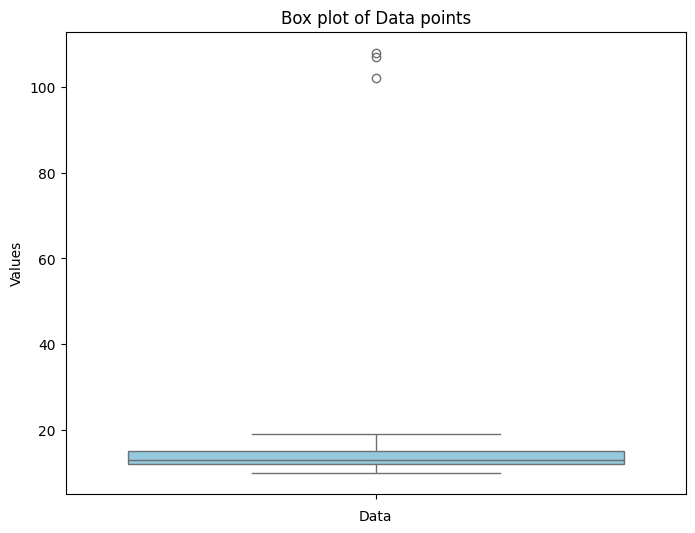

In [15]:
# Draw Box plot

plt.figure(figsize=(8, 6)) # set the figure size
sns.boxplot(data=dataset, color='skyblue') # create the box plot
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box plot of Data points')
plt.show()

From above box plot also, we get the 3 values around 100 as outliers. Since it is above Maximum values of our Box plot.

### Assignments:

**`Q. From the above dataset remove detected outliers and draw the histogram plot to see data distributions.`**